In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import argparse
import facenet
import lfw
import os
import sys
import cv2
import pickle

from tensorflow.python.ops import data_flow_ops
from sklearn import metrics
from scipy.optimize import brentq
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.io import loadmat
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from sklearn.externals import joblib
import seq_nn_3d
import tracklet_utils_3c
import track_lib
import tracklet_classifier_train
import tracklet_utils_3d_online

D:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
D:\Code\update_facenet\facenet-master\facenet-master\src\tracklet_utils_3c.py:2965: SyntaxWarning: name 'track_struct' is used prior to global declaration
  global track_struct


In [2]:
tracklet_classifier_train.train_classifier()

0
1
2
3
4
0.0


In [2]:
tracklet_classifier_train.extract_classifier_features()

0
1
2
3
4


In [2]:
track_struct = tracklet_utils_3c.TC_tracker()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [3]:
conf_M,acc1,acc2 = tracklet_utils_3c.check_classfication()
print(conf_M)
print(acc1)
print(acc2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
[[188.  10.]
 [ 18.  84.]]
[0.81333333 0.83666667 0.85333333 0.86333333 0.87666667 0.89
 0.90333333 0.89666667 0.89333333 0.9        0.90666667 0.89333333
 0.89333333 0.88333333 0.86       0.84333333 0.83       0.82333333
 0.80666667 0.8       ]
[0.34       0.34666667 0.35666667 0.37666667 0.44333333 0.54333333
 0.66333333 0.75666667 0.83       0.85333333 0.87666667 0.89666667
 0.89333333 0.89666667 0.88333333 0.85666667 0.82333333 0.8033

In [5]:
conf_M

array([[ 700.,  286.],
       [ 182., 1208.]])

In [6]:
acc2

array([0.59511785, 0.60858586, 0.65277778, 0.71548822, 0.77483165,
       0.81060606, 0.81902357, 0.80892256, 0.76346801, 0.69191919,
       0.61153199, 0.52777778, 0.46632997, 0.4297138 , 0.41835017,
       0.41498316, 0.41498316, 0.41498316, 0.41498316])

In [3]:
tracklet_utils_3c.convert_frames_to_video('D:/Data/haotian/tracking_img/uav0000013_00000_v'+'/', 'D:/Data/haotian/tracking_video/uav0000013_00000_v.avi', 20)

In [2]:
'''
det_path = 'D:/Data/UA-Detrac/CompACT-test/CompACT/MVI_39051_Det_CompACT.txt'
img_folder = 'D:/Data/UA-Detrac/DETRAC-test-data/Insight-MVT_Annotation_Test/MVI_39051'
crop_det_folder = 'D:/Data/UA-Detrac/crop_det/MVI_39051'
triplet_model = 'D:/Data/UA-Detrac/UA_Detrac_model/20180627-211315'
#seq_model = 'D:/Data/UA-Detrac/cnn_appear_model_517_128_16600steps/model.ckpt'
seq_model = 'D:/Data/UA-Detrac/fine_tune_model/model.ckpt'
tracking_img_folder = 'D:/Data/UA-Detrac/tracking_img/MVI_39051'
tracking_video_path = 'D:/Data/UA-Detrac/tracking_video/MVI_39051.avi'
save_fea_path = 'D:/Data/UA-Detrac/save_fea_mat/MVI_39051.obj'
save_label_path = 'D:/Data/UA-Detrac/save_fea_mat/MVI_39051_label.obj'
'''

'''
det_path = 'D:/Data/KITTI/data_tracking_det_2_regionlets/testing/det_02/0000.txt'
img_folder = 'D:/Data/KITTI/data_tracking_image_2/testing/image_02/0000'
crop_det_folder = 'D:/Data/KITTI/crop_det/0000'
triplet_model = 'D:/Data/UA-Detrac/UA_Detrac_model/20180627-211315'
#seq_model = 'D:/Data/UA-Detrac/cnn_appear_model_517_128_16600steps/model.ckpt'
seq_model = 'D:/Data/UA-Detrac/cnn_appear_reducemean_7700steps/model.ckpt'
tracking_img_folder = 'D:/Data/KITTI/tracking_img/0000'
tracking_video_path = 'D:/Data/KITTI/tracking_video/0000.avi'
save_fea_path = 'D:/Data/KITTI/save_fea_mat/0000.obj'
save_label_path = 'D:/Data/KITTI/save_fea_mat/0000_label.obj'
max_length = 64
feature_size = 4+512
batch_size = 64
num_classes = 2
'''

"\ndet_path = 'D:/Data/KITTI/data_tracking_det_2_regionlets/testing/det_02/0000.txt'\nimg_folder = 'D:/Data/KITTI/data_tracking_image_2/testing/image_02/0000'\ncrop_det_folder = 'D:/Data/KITTI/crop_det/0000'\ntriplet_model = 'D:/Data/UA-Detrac/UA_Detrac_model/20180627-211315'\n#seq_model = 'D:/Data/UA-Detrac/cnn_appear_model_517_128_16600steps/model.ckpt'\nseq_model = 'D:/Data/UA-Detrac/cnn_appear_reducemean_7700steps/model.ckpt'\ntracking_img_folder = 'D:/Data/KITTI/tracking_img/0000'\ntracking_video_path = 'D:/Data/KITTI/tracking_video/0000.avi'\nsave_fea_path = 'D:/Data/KITTI/save_fea_mat/0000.obj'\nsave_label_path = 'D:/Data/KITTI/save_fea_mat/0000_label.obj'\nmax_length = 64\nfeature_size = 4+512\nbatch_size = 64\nnum_classes = 2\n"

In [3]:

seq_name = 'MOT17-14-SDP'
img_name = 'MOT17-14'
sub_seq_name = ''
img_folder = 'D:/Data/MOT/MOT17Det/train/'+img_name+sub_seq_name+'/img1'
tracking_img_folder = 'D:/Data/MOT/tracking_img/'+seq_name+sub_seq_name
track_struct_path = 'D:/Data/MOT/track_struct/'+seq_name+sub_seq_name+'.obj'
tracking_video_path = 'D:/Data/MOT/tracking_video/'+seq_name+sub_seq_name+'.avi'
save_fea_path = 'D:/Data/MOT/save_fea_mat/'+seq_name+sub_seq_name+'.obj'
save_label_path = 'D:/Data/MOT/save_fea_mat/'+seq_name+sub_seq_name+'_label.obj'
save_remove_path = 'D:/Data/MOT/save_fea_mat/'+seq_name+sub_seq_name+'_remove_set.obj'
save_all_label_path = 'D:/Data/MOT/save_fea_mat/'+seq_name+sub_seq_name+'_all_label.obj'
appear_mat_path = 'D:/Data/MOT/appear_mat/'+seq_name+'.obj'
#save_all_fea_path1 = 'D:/Data/MOT/save_fea_mat/'+seq_name+sub_seq_name+'_all1.obj'
#save_all_label_path1 = 'D:/Data/MOT/save_fea_mat/'+seq_name+sub_seq_name+'_all_label0.obj'
#save_all_fea_path2 = 'D:/Data/MOT/save_fea_mat/'+seq_name+sub_seq_name+'_all2.obj'
#save_all_label_path2 = 'D:/Data/MOT/save_fea_mat/'+seq_name+sub_seq_name+'_all_label1.obj'
#save_remove_path = 'D:/Data/MOT/save_fea_mat/'+seq_name+sub_seq_name+'_remove_set.obj'
#all_fea_mat1 = pickle.load(open(save_all_fea_path1,'rb'))
#all_fea_label1 = pickle.load(open(save_all_label_path1,'rb'))
#all_fea_mat2 = pickle.load(open(save_all_fea_path2,'rb'))
#all_fea_label2 = pickle.load(open(save_all_label_path2,'rb'))
#track_set = pickle.load(open(save_label_path,'rb'))
#remove_set = pickle.load(open(save_remove_path,'rb'))
track_struct = pickle.load(open(track_struct_path,'rb'))


In [4]:
track_struct['track_params']

{'IOU_gt_flag': 0,
 'IOU_thresh': 0.3,
 'color_thresh': 0.05,
 'const_fr_thresh': 1,
 'crop_size': 182,
 'det_h_thresh': 53,
 'det_thresh': 0.5,
 'det_y_thresh': 460,
 'h_score_flag': 0,
 'img_size': (1080, 1920, 3),
 'linear_pred_thresh': 5,
 'merge_IOU': 0.7,
 'num_fr': 750,
 'num_time_cluster': 8,
 'pre_det_score': 0.8,
 'pre_len': 3,
 'search_radius': 1,
 'svm_score_flag': 0,
 't_dist_thresh': 30,
 'time_cluster_dist': 100,
 'track_overlap_thresh': 0.1,
 'use_F': 1,
 'y_score_flag': 0}

In [2]:
ap = pickle.load(open('D:/Data/MOT/appear_mat/MOT16-14_ap.obj','rb'))

In [6]:
pickle.dump(track_struct['tracklet_mat']['appearance_fea_mat'], open(appear_mat_path, 'wb'))

In [4]:
len(np.where(track_struct['tracklet_mat']['xmin_mat'][164,:]!=-1)[0])

3

In [4]:
import scipy
F=scipy.io.loadmat('D:/Data/MOT/geometry_info/MOT17-14_F_set.mat')

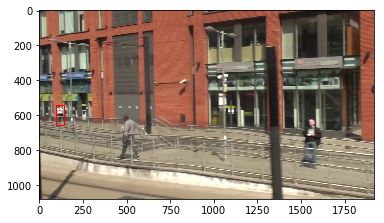

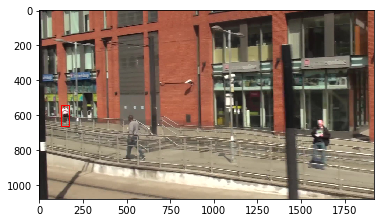

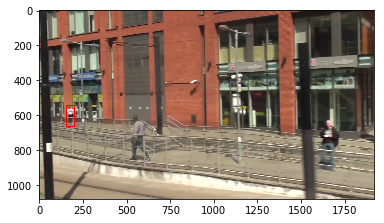

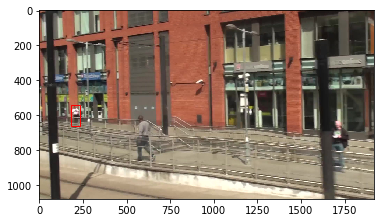

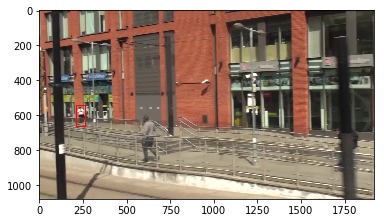

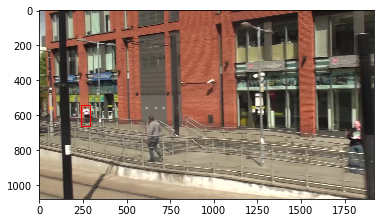

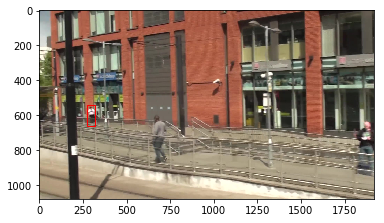

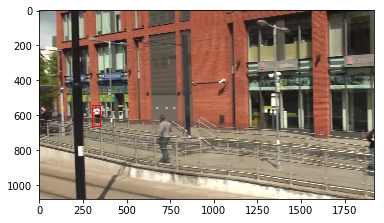

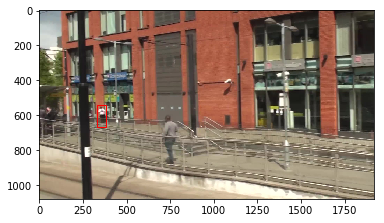

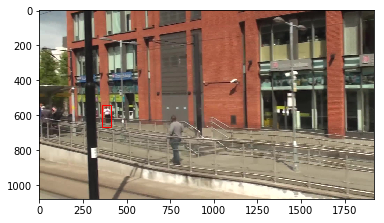

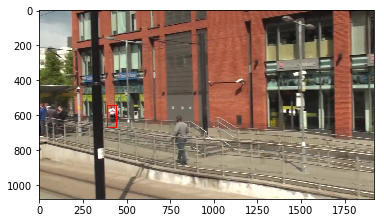

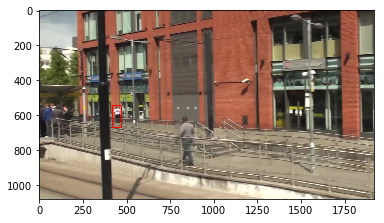

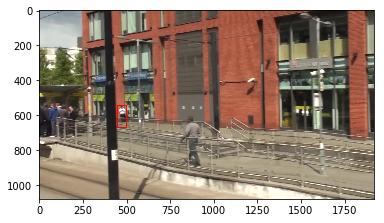

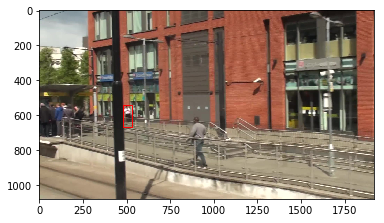

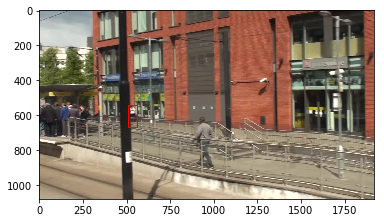

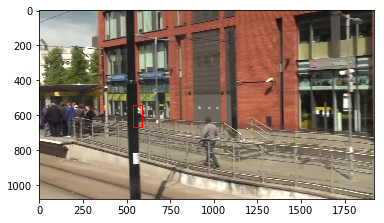

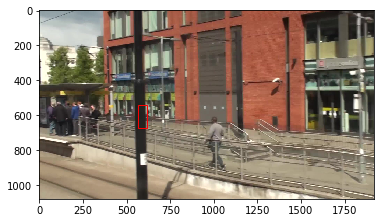

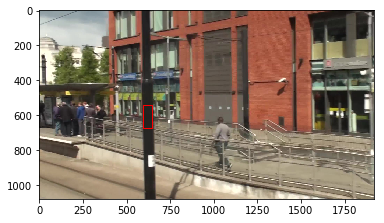

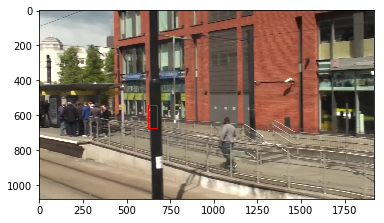

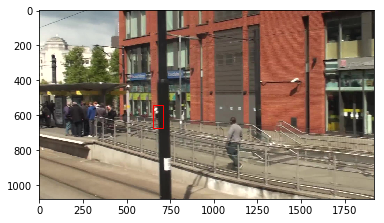

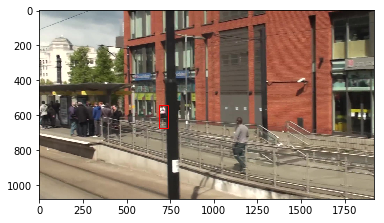

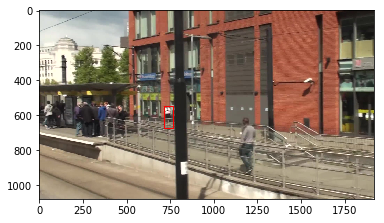

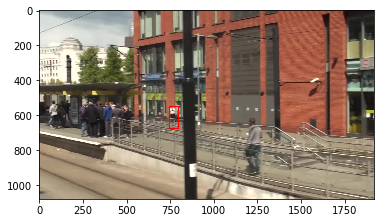

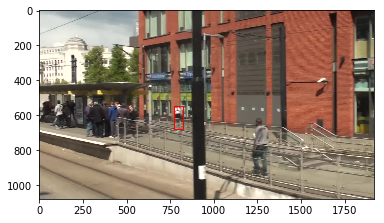

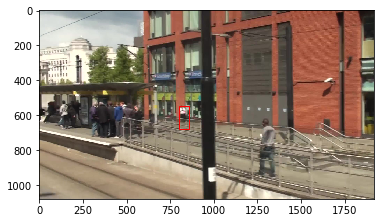

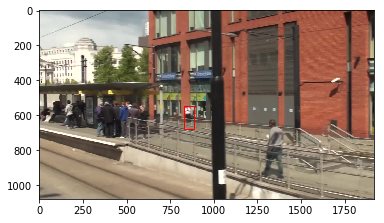

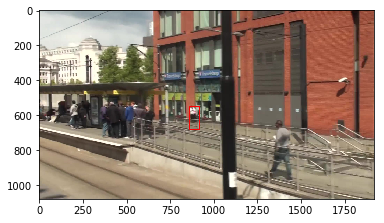

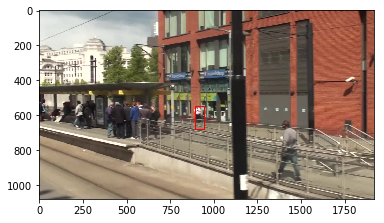

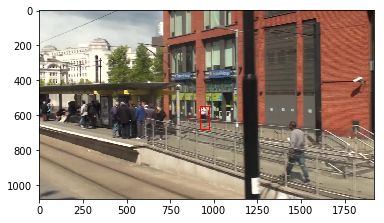

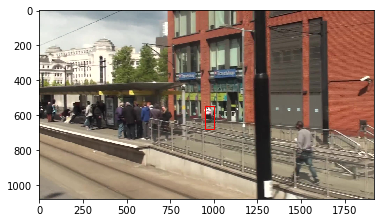

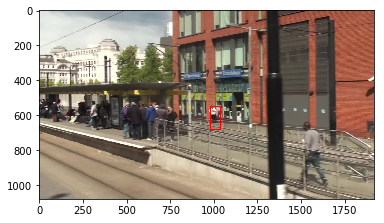

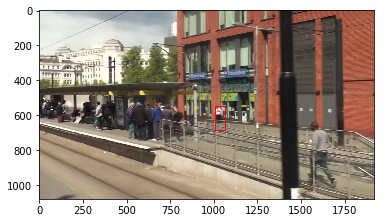

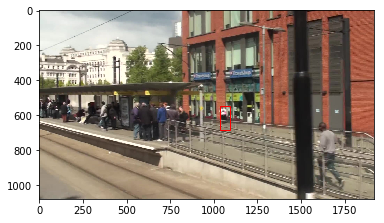

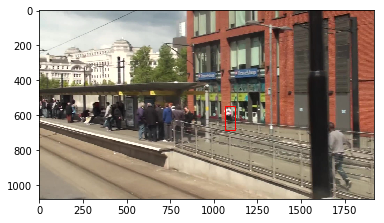

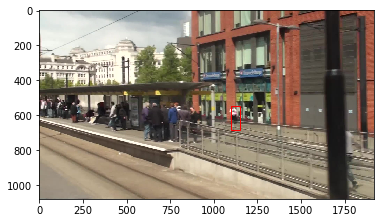

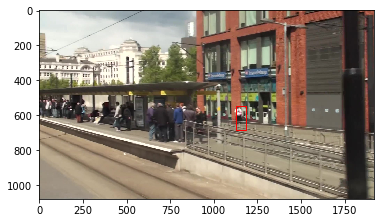

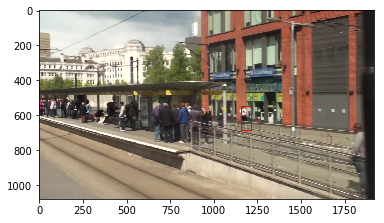

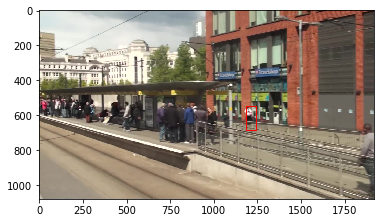

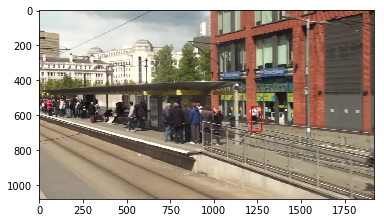

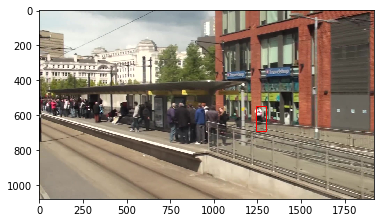

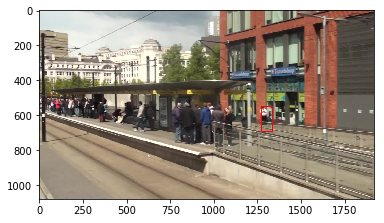

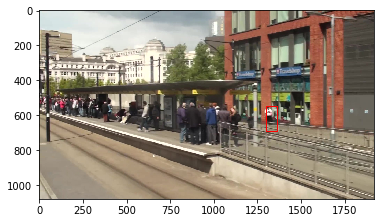

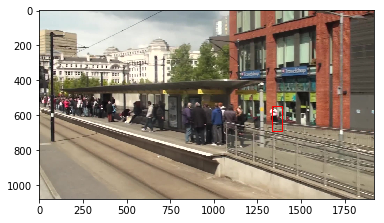

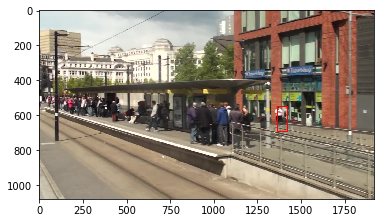

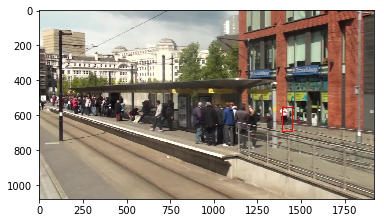

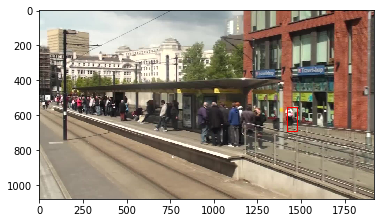

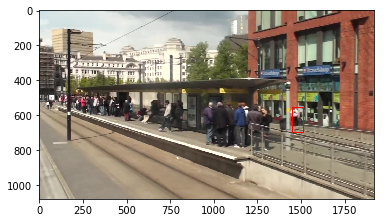

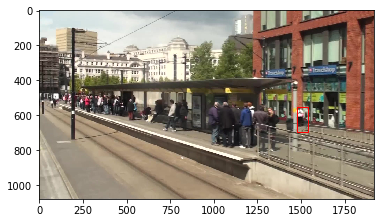

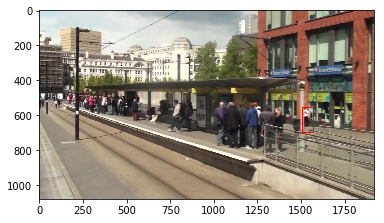

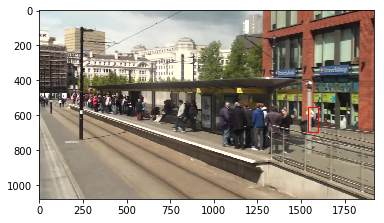

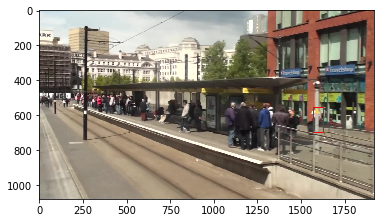

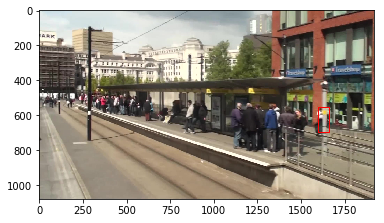

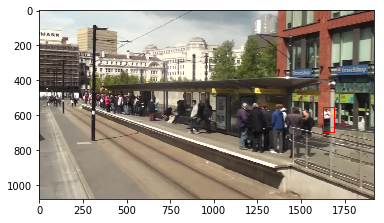

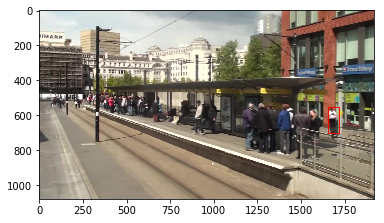

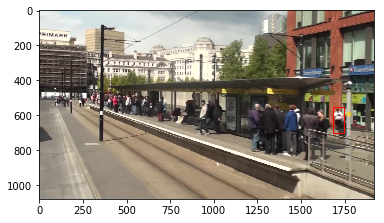

In [2]:
seq_name = 'MOT17-14-SDP'
img_name = 'MOT17-14'
sub_seq_name = ''
img_folder = 'D:/Data/MOT/MOT17Det/test/'+img_name+sub_seq_name+'/img1'
F_path = 'D:/Data/MOT/geometry_info/'+img_name+'_F_set.mat'
F_set = loadmat(F_path)
F_set = F_set['F_set']
img_list = os.listdir(img_folder)
st_fr = 326
end_fr = 382
imgs = []
for n in range(st_fr,end_fr+1):
    img_name = track_lib.file_name(n,6)+'.jpg'
    img_path = img_folder+'/'+img_name
    img = misc.imread(img_path) 
    imgs.append(img)

start_bbox = [64,539,111,657]
end_bbox = [1715,553,1776,700]
interp_bbox = track_lib.bbox_interp_with_F(F_set, st_fr, end_fr, start_bbox, end_bbox)
cnt = 0
for n in range(st_fr+1,end_fr):
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(imgs[cnt+1])

    xmin = interp_bbox[cnt,0]
    ymin = interp_bbox[cnt,1]
    w = interp_bbox[cnt,2]
    h = interp_bbox[cnt,3]
    rect = patches.Rectangle((xmin,ymin),w,h,linewidth=1,edgecolor='#FF0000', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.show()
    #import pdb; pdb.set_trace()
    cnt = cnt+1

In [4]:
F_set[:,:,st_fr:end_fr]

array([[[-3.30109753e-07, -5.05352377e-07, -2.49170190e-07,
         -1.42644906e-07, -2.93853325e-08, -1.77092148e-07,
         -2.99512239e-07, -7.52313866e-08,  1.93074966e-08,
          5.95048523e-08,  1.31678102e-07,  1.28800180e-07,
          1.04993126e-07,  8.23179366e-08,  1.08112813e-07,
         -3.84059622e-08,  1.22174073e-07,  3.80471424e-08,
          2.70635208e-07,  6.06920211e-07,  2.33031937e-08],
        [-5.87769653e-04, -4.72033763e-04, -1.95914567e-04,
         -2.21048365e-04, -3.42211016e-04, -1.96284517e-04,
         -3.15936746e-04, -2.65821022e-04, -1.48878568e-04,
         -2.04453152e-04, -1.43173339e-04, -1.10024587e-04,
         -1.56045884e-04, -1.60740154e-04, -1.18804189e-04,
         -1.02794019e-04, -2.37503308e-04, -2.45082205e-04,
         -2.93879755e-04, -8.27939727e-04,  9.45419472e-04],
        [ 1.50843954e-01,  1.09449346e-01,  3.68801125e-02,
          8.03784962e-02,  6.12176580e-02,  3.09777996e-02,
          4.76796063e-02,  6.41917790e

In [ ]:

idx = np.where(np.logical_and(all_fea_label1[:,0]==503, all_fea_label1[:,1]==516))[0]
print(all_fea_label1[idx,:])
idx = np.where(np.logical_and(all_fea_label2[:,0]==1099, all_fea_label2[:,1]==1105))[0]
print(all_fea_label2[idx,:])


In [3]:
remove_set = [10,12,13,15,17,19,21,25,26,22,27,35,34,38,43,45,41,47,16,48,52,56,62,65,66,68,72,74,78,79,80,73,81,83,95,100,
             86,88,90,96,106,102,110,111,114,115,116,119,82,134,128,132,136,138,121,140,145,146,152,139,157,148,159,164,166,
             168,171,173,174,178,181,184,192,196,197,186,200,202,207,210,212,221,228,234,248,250,259,261,268,275,266,271,
             272,283,285,288,297,300,303,310,307,325,335,336,341,350,357,359,360,362,363,366,371,375,378,383,384,389,391,
             392,395,387,394,400,412,418,425,432,451,466,468,470,472,473,474,475,476,481,483,502,516,522,523,524,530,534,538,
             540,542,548,550,561,562,566,571,575,577,580,582,586,590,593,597,601,605,606,603,607,608,609,615,620,621,623,624,
             625,627,628,631,632,635,638,645,648,649,650,651,652,655,656,658,659,660,662,668,669,666,673,680,681,686,689,690,
             695,694,698,700,692,714,719,727,728,733,734,731,742,746,754,755,757,759,760,]

In [4]:
pickle.dump(remove_set,open(save_remove_path,'wb'))

In [2]:
for n in range(1,0,-1):
    print(n)

1


In [ ]:
track_struct = pickle.load(open(track_struct_path,'rb'))

In [5]:
track_set = [[41,60,1],[42,51,0],[47,51,1],[51,54,1],[42,57,1],[66,70,1],[70,77,1],[79,82,1],[86,122,1],[245,247,1],
            [235,255,0],[275,294,1],[294,300,1]]


In [6]:
track_set = np.array(track_set)
pickle.dump(track_set,open(save_label_path,'wb'))

In [ ]:
track_struct['final_tracklet_mat']['track_class'][1][0]

In [ ]:
track_struct['final_tracklet_mat']['track_cluster'][28]

In [7]:
A=np.array([[1,2],[3,4],[5,6]])
B=A[np.array([0,2]),:].copy()
A[0,0]=0
print(A)
print(B)

[[0 2]
 [3 4]
 [5 6]]
[[1 2]
 [5 6]]
